# Data Exploration

## Load Data

In [20]:
## load cifar10 data from Assignment1/data/cifar-10/cifar-10-batches-py/data_batch_1
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# hard code the path into the function
# /Users/axhome/AX/MASTER/Courses/DD2424/DD2424-DeepLearning/Assignment1/data/cifar-10/cifar-10-batches-py

def load_cifar10_data(batch_id):
    # load the data
    cifar10_path = "/Users/axhome/AX/MASTER/Courses/DD2424/DD2424-DeepLearning/Assignment1/data/cifar-10/cifar-10-batches-py"

    with open(cifar10_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')
    
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
    
    return features, labels



In [21]:
# load the data example
features, labels = load_cifar10_data(1)
print("features shape: ", features.shape)
print("labels shape: ", len(labels))
print()
# what is the last feature dimension
print("last features shape: ", features.shape[3])
print("this above represents the number of channels in the image")
print("which means that the image is a RGB image")


features shape:  (10000, 32, 32, 3)
labels shape:  10000

last features shape:  3
this above represents the number of channels in the image
which means that the image is a RGB image


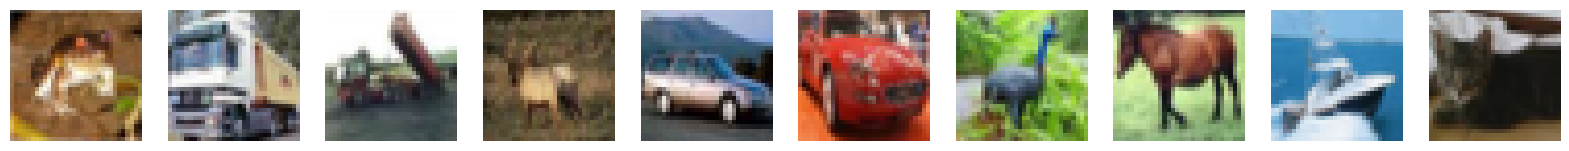

In [23]:
# load a batch of training data 
cifar_dir = "/Users/axhome/AX/MASTER/Courses/DD2424/DD2424-DeepLearning/Assignment1/data/cifar-10/cifar-10-batches-py"
with open(cifar_dir + '/data_batch_1', mode='rb') as fo:
    dict = pickle.load(fo, encoding='bytes')

# Extract the image data and cast to float from the dict 
X = dict[b'data'].astype(np.float64)/255.0
X = X.transpose()
nn = X.shape[1]

# Reshape each image from a column vector to a 3d array
X_im = X.reshape((32, 32, 3, nn), order='F') # order F is used to reshape the array in the same way as the original image
X_im = np.transpose(X_im, (1, 0, 2, 3)) # transpose the image to the correct orientation

# Display the first 10 images
ni = 10
fig, axs = plt.subplots(1, ni, figsize=(20, 20))
for i in range(ni):
    axs[i].imshow(X_im[:, :, :, i])
    axs[i].axis('off')
plt.show()


## Display images

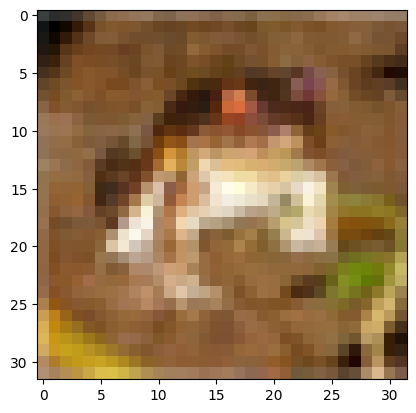

In [16]:
import matplotlib.pyplot as plt

image1 = features[0]
plt.imshow(image1)
plt.show()


In [24]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt

def load_cifar10_batch(batch_id):
    """
    Load a single batch of CIFAR-10 data.

    Parameters:
        batch_id (int): The batch number (1 to 5) to load.

    Returns:
        images (numpy.ndarray): Flattened image data of shape (num_samples, 3072).
        labels (numpy.ndarray): Corresponding labels.
    """
    cifar10_path = "/Users/axhome/AX/MASTER/Courses/DD2424/DD2424-DeepLearning/Assignment1/data/cifar-10/cifar-10-batches-py"
    # Construct full file path
    batch_file = os.path.join(cifar10_path, f"data_batch_{batch_id}")

    # Load the batch file using pickle
    with open(batch_file, mode='rb') as file:
        batch = pickle.load(file, encoding='bytes')  # Ensures compatibility with Python 3

    # Extract image data and labels
    images = np.array(batch[b'data'])  # Image data in shape (num_samples, 3072)
    labels = np.array(batch[b'labels'])  # Labels as a 1D array

    return images, labels

def reshape_images(images):
    """
    Reshape CIFAR-10 images from (num_samples, 3072) to (num_samples, 32, 32, 3).

    Parameters:
        images (numpy.ndarray): Flattened CIFAR-10 image data.

    Returns:
        reshaped_images (numpy.ndarray): Images reshaped to (num_samples, 32, 32, 3).
    """
    # Reshape to (num_samples, 3, 32, 32)
    images = images.reshape((len(images), 3, 32, 32))

    # Transpose to (num_samples, 32, 32, 3) for correct image format
    reshaped_images = images.transpose(0, 2, 3, 1)

    return reshaped_images

def normalize_images(images):
    """
    Normalize image pixel values from range [0, 255] to [0, 1].

    Parameters:
        images (numpy.ndarray): Image data.

    Returns:
        normalized_images (numpy.ndarray): Normalized image data.
    """
    return images.astype(np.float32) / 255.0

def plot_random_images(images, labels, num_images=10):
    """
    Display a set of random images from the CIFAR-10 dataset.

    Parameters:
        images (numpy.ndarray): CIFAR-10 images of shape (num_samples, 32, 32, 3).
        labels (numpy.ndarray): Corresponding labels.
        num_images (int): Number of random images to display.
    """
    # Define CIFAR-10 class names for better visualization
    class_names = [
        'airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck'
    ]

    # Select random indices to display
    indices = np.random.choice(images.shape[0], num_images, replace=False)

    # Create subplots for visualization
    fig, axs = plt.subplots(1, num_images, figsize=(15, 3))
    
    for i, idx in enumerate(indices):
        axs[i].imshow(images[idx])
        axs[i].axis('off')
        axs[i].set_title(class_names[labels[idx]])  # Display class name

    plt.show()


In [29]:
# Define CIFAR-10 data path

# Step 1: Load raw CIFAR-10 data (flattened)
images, labels = load_cifar10_batch(1)


In [30]:
labels.shape

(10000,)

In [31]:

# Step 2: Reshape images to (num_samples, 32, 32, 3)
images = reshape_images(images)


In [32]:
images.shape

(10000, 32, 32, 3)

In [33]:

# Step 3: Normalize images (optional for deep learning models)
images = normalize_images(images)


In [34]:
images.shape

(10000, 32, 32, 3)

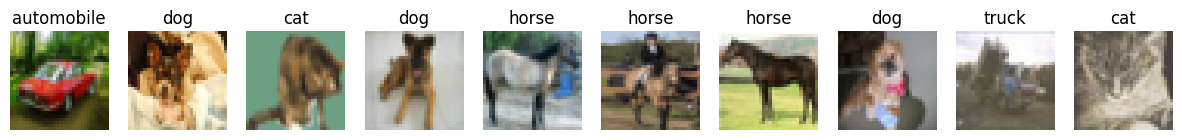

In [35]:

# Step 4: Visualize random images (optional)
plot_random_images(images, labels, num_images=10)
